In [1]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
#loading sample data
SampleStoreData = pd.read_excel('/Users/gargi/Desktop/DSC_SB/data_story/superstore.xls')

In [3]:
# viewing the data
SampleStoreData.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
SampleStoreData.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
#creating new column profit percentage
SampleStoreData['Profit_percentage'] = (SampleStoreData['Profit']/SampleStoreData['Sales'])*100


/Users/gargi/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Segment', ylabel='count'>

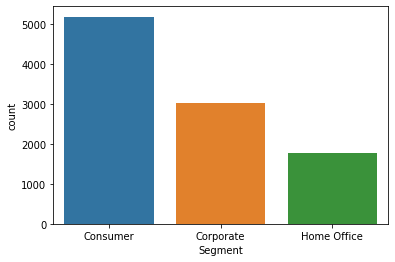

In [8]:
#Checking segment distribution
sns.countplot(SampleStoreData['Segment'])

In [12]:
#Creating three different datasets from segments
SampleStoreData_Cons = SampleStoreData[SampleStoreData['Segment'] == 'Consumer']
SampleStoreData_Corp = SampleStoreData[SampleStoreData['Segment'] == 'Corporate']
SampleStoreData_Home = SampleStoreData[SampleStoreData['Segment'] == 'Home Office']

In [24]:
# Checking profit percent by category
np.mean(SampleStoreData_Cons['Profit_percentage'])

11.204952133156496

In [23]:
np.mean(SampleStoreData_Corp['Profit_percentage'])

12.120260868746454

In [22]:
np.mean(SampleStoreData_Home['Profit_percentage'])

14.286958506103376

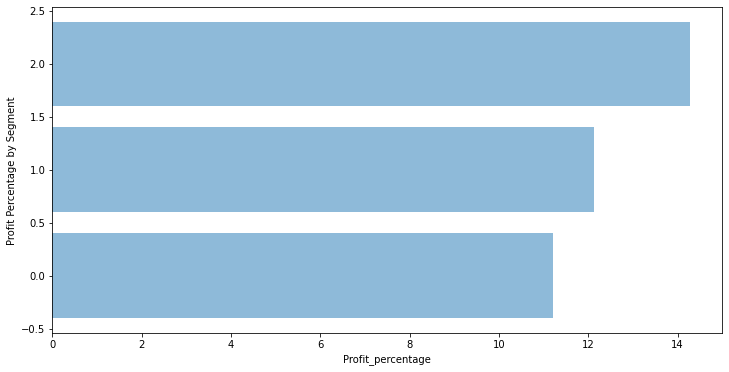

In [27]:
var = ['Consumer', 'Corporate', 'Home Office']
y = np.arange(len(var))
Performance = [11.20, 12.12, 14.28]
plt.figure(figsize=(12, 6))
plt.barh(y, Performance, alpha = 0.5)
plt.xlabel('Profit_percentage')
plt.ylabel('Profit Percentage by Segment')
plt.show()

In [28]:
#checking distribution of Consumer profit percentange
SampleStoreData_Cons['Profit_percentage'].describe()

count    5191.000000
mean       11.204952
std        47.846643
min      -275.000000
25%         6.250000
50%        27.000000
75%        36.250000
max        50.000000
Name: Profit_percentage, dtype: float64

In [35]:
average_profit = SampleStoreData_Cons.groupby('Sub-Category')['Profit_percentage'].mean()

In [36]:
average_profit = pd.DataFrame(average_profit)
average_profit

,Profit_percentage
Sub-Category,
Accessories,20.460172
Appliances,-20.997268
Art,24.722547
Binders,-21.393269
Bookcases,-15.949371
Chairs,4.266705
Copiers,29.128571
Envelopes,41.767442
Fasteners,31.754386


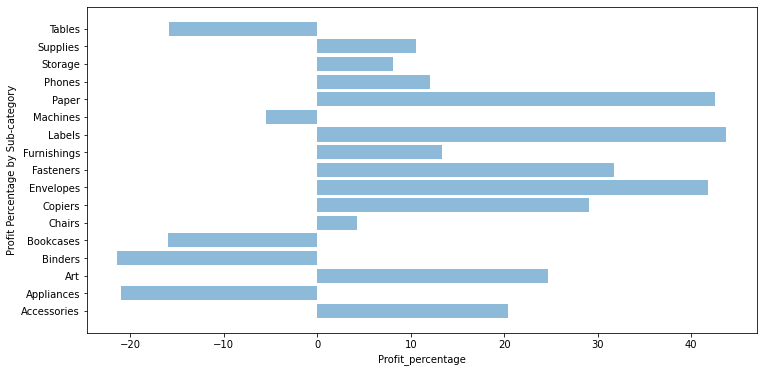

In [38]:
objects = average_profit.index
y_pos = np.arange(len(objects))
Performance = average_profit['Profit_percentage']
plt.figure(figsize=(12, 6))
plt.barh(y_pos, Performance, align ='center', alpha = 0.5)
plt.xlabel('Profit_percentage')
plt.ylabel('Profit Percentage by Sub-category')
plt.yticks(y_pos, objects)
plt.show()

In [39]:
average_profit = SampleStoreData_Home.groupby('Sub-Category')['Profit_percentage'].mean()

In [40]:
average_profit = pd.DataFrame(average_profit)
average_profit

,Profit_percentage
Sub-Category,
Accessories,23.178571
Appliances,-4.356965
Art,26.076667
Binders,-18.365432
Bookcases,1.993316
Chairs,4.139921
Copiers,38.019231
Envelopes,42.042683
Fasteners,24.948864


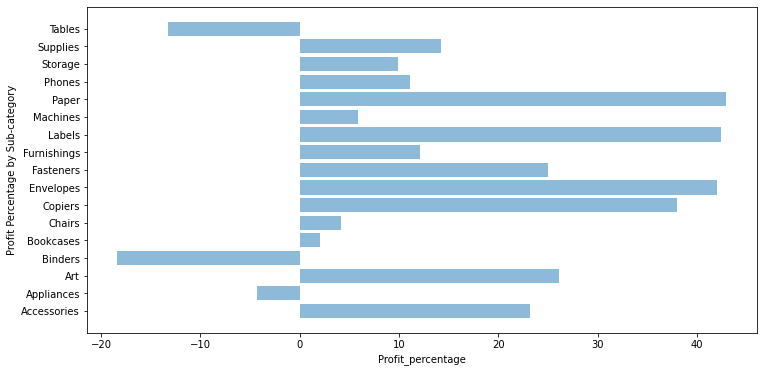

In [41]:
objects = average_profit.index
y_pos = np.arange(len(objects))
Performance = average_profit['Profit_percentage']
plt.figure(figsize=(12, 6))
plt.barh(y_pos, Performance, align ='center', alpha = 0.5)
plt.xlabel('Profit_percentage')
plt.ylabel('Profit Percentage by Sub-category')
plt.yticks(y_pos, objects)
plt.show()

In [43]:
average_profit = SampleStoreData_Corp.groupby('Sub-Category')['Profit_percentage'].mean()

In [44]:
average_profit = pd.DataFrame(average_profit)
average_profit

,Profit_percentage
Sub-Category,
Accessories,23.429515
Appliances,-12.224910
Art,25.404817
Binders,-18.505109
Bookcases,-13.496958
Chairs,4.738665
Copiers,32.158333
Envelopes,43.285714
Fasteners,30.072034


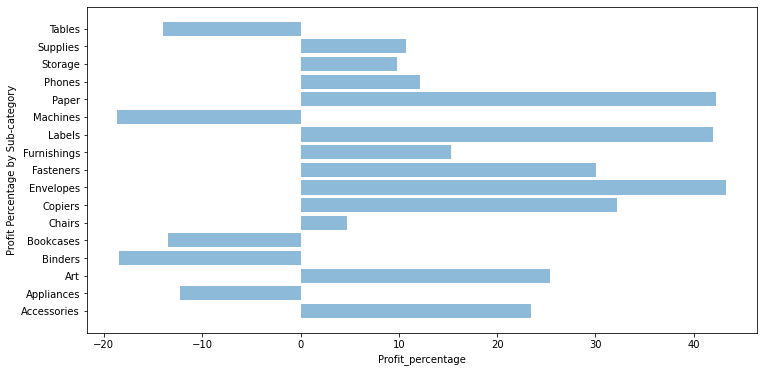

In [45]:
objects = average_profit.index
y_pos = np.arange(len(objects))
Performance = average_profit['Profit_percentage']
plt.figure(figsize=(12, 6))
plt.barh(y_pos, Performance, align ='center', alpha = 0.5)
plt.xlabel('Profit_percentage')
plt.ylabel('Profit Percentage by Sub-category')
plt.yticks(y_pos, objects)
plt.show()